In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [36]:
work_dir = os.environ['WORK']

In [50]:
transform = transforms.Compose([
    # transforms.CenterCrop(10),
    transforms.Resize((224, 224)),
#     transforms.Resize((28, 28)),
    transforms.ToTensor(),
])
# transform = transforms.Compose([
# #     transforms.Scale(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])


In [74]:
# ds = torchvision.datasets.MNIST(f'{work_dir}/datasets/mnist/', train=True)
# ds = torchvision.datasets.CIFAR10(f'{work_dir}/datasets/cifar10/', transform=transform)
# ds = torchvision.datasets.ImageNet(f'{work_dir}/datasets/imagenet/', transform=transform)
ds = ImageNetN(f'{work_dir}/datasets/imagenet/', n_classes=10, transform=transform)
# ds_test = ImageNetN(f'{work_dir}/datasets/imagenet/', n_classes=10, transform=transform, imgnetn=ds)

In [58]:
dl = DataLoader(ds, batch_size=100, num_workers=16, shuffle=True)
x, y = next(iter(dl))

0 mushroom


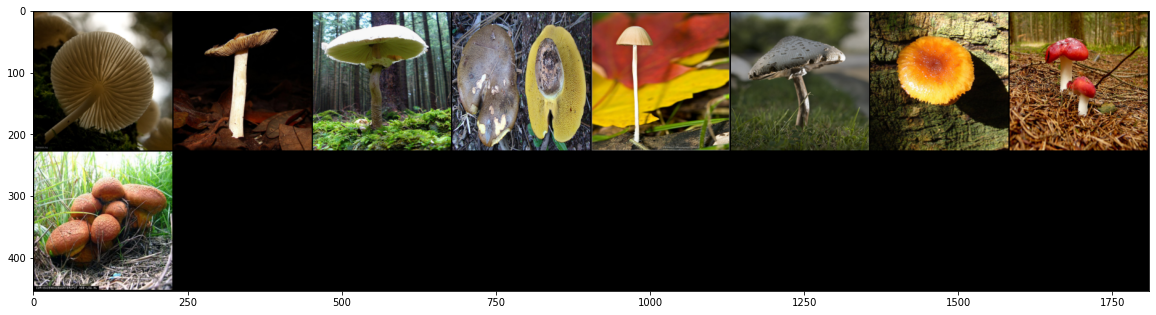

1 swimming trunks


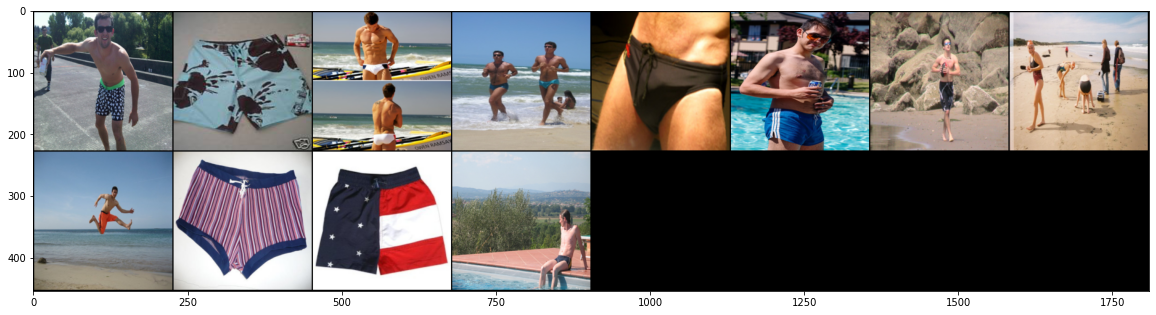

2 cliff dwelling


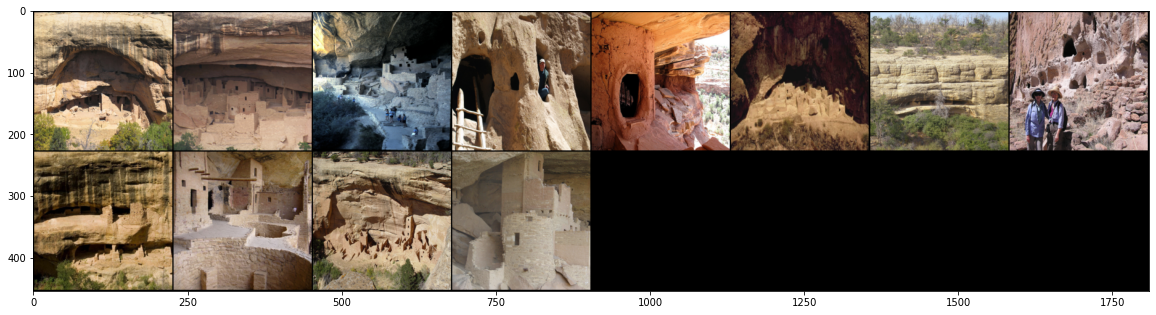

3 chainlink fence


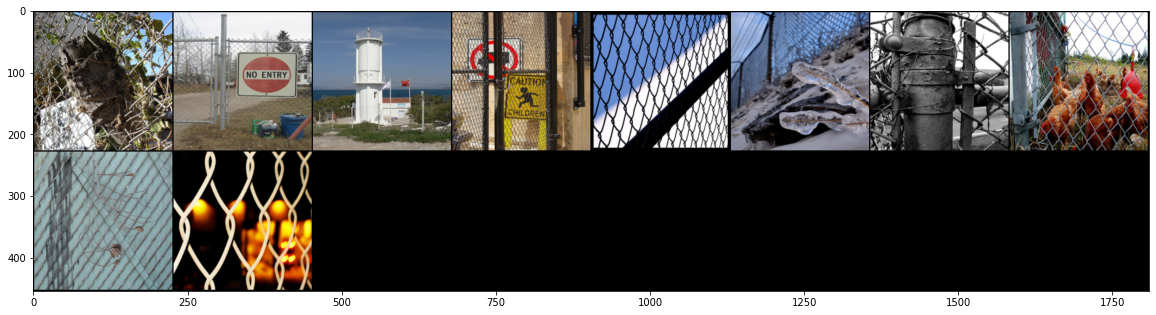

4 nipple


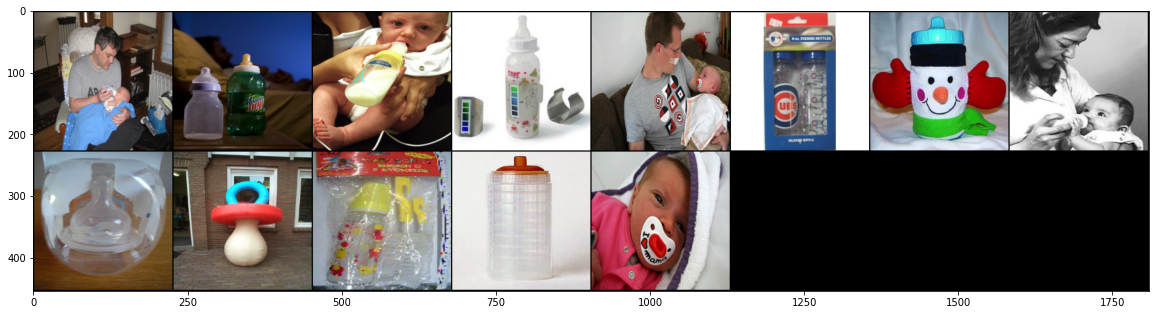

5 Bedlington terrier


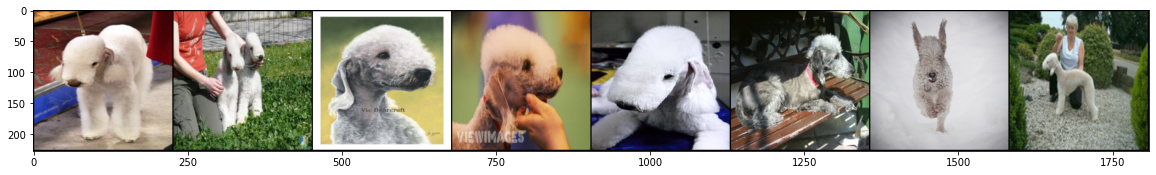

6 muzzle


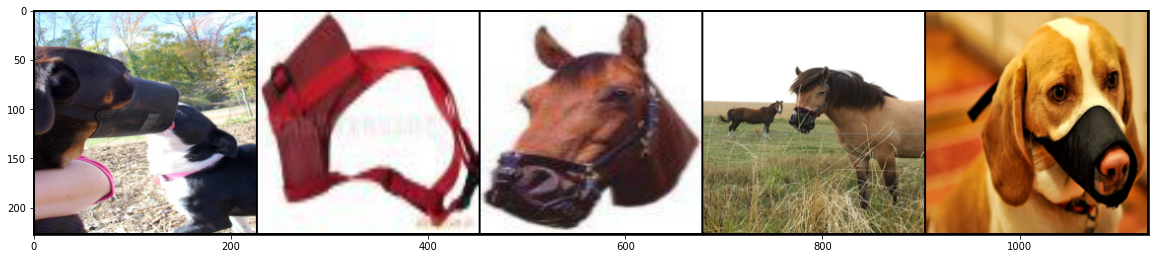

7 scorpion


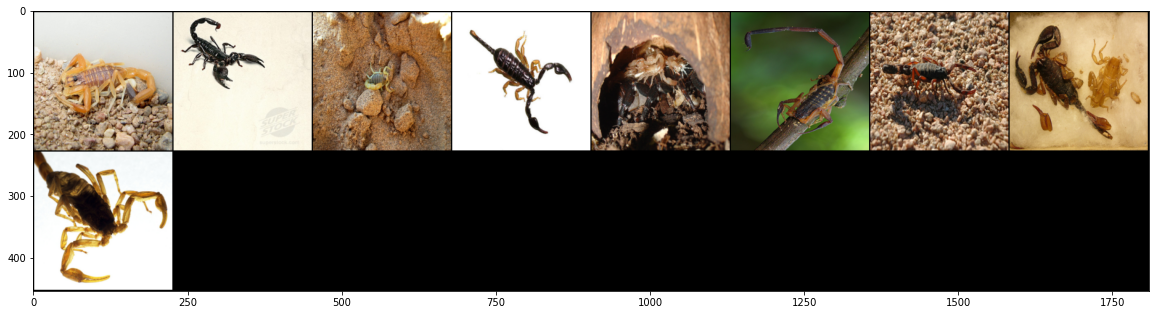

8 harvestman


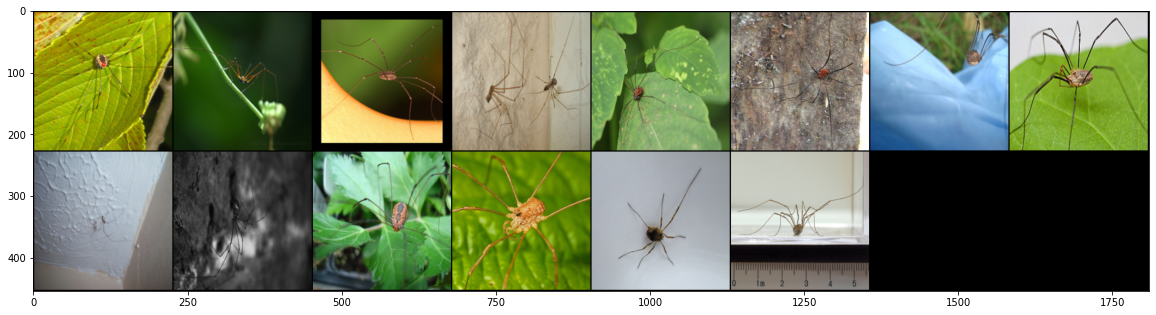

9 kuvasz


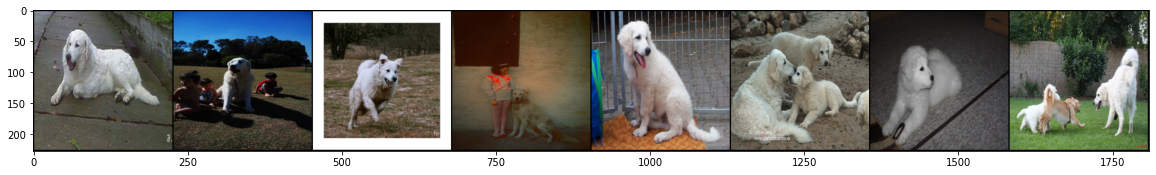

In [59]:
# y_idx = scipy.stats.mode(y).mode[0]
for y_idx in range(10):
    xp = x[y==y_idx]
    print(y_idx, ds.classes[y_idx])
    if (y==y_idx).sum()>1:
        plt.figure(figsize=(20, 10))
        plt.imshow(torchvision.utils.make_grid(xp).permute(1, 2,0).numpy())
        plt.show()

In [5]:
import timm
import torchinfo

In [48]:
net = timm.models.mlp_mixer.mixer_b16_224(pretrained=True)
net = net.cuda()
torchinfo.summary(net, input_size=(10, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
MlpMixer                                 --                        --
├─PatchEmbed: 1-1                        [10, 196, 768]            --
│    └─Conv2d: 2-1                       [10, 768, 14, 14]         590,592
│    └─Identity: 2-2                     [10, 196, 768]            --
├─Sequential: 1-2                        [10, 196, 768]            --
│    └─MixerBlock: 2-3                   [10, 196, 768]            --
│    │    └─LayerNorm: 3-1               [10, 196, 768]            1,536
│    │    └─Mlp: 3-2                     [10, 768, 196]            151,108
│    │    └─Identity: 3-3                [10, 196, 768]            --
│    │    └─LayerNorm: 3-4               [10, 196, 768]            1,536
│    │    └─Mlp: 3-5                     [10, 196, 768]            4,722,432
│    │    └─Identity: 3-6                [10, 196, 768]            --
│    └─MixerBlock: 2-4                   [10, 196, 768]       

In [41]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
ds = torchvision.datasets.ImageNet(f'{work_dir}/datasets/imagenet/', split='val', 
                                   transform=transform)
dl = DataLoader(ds, batch_size=10, shuffle=True, num_workers=16)

In [45]:
correct, wrong = 0, 0
for i, (x_batch, y_batch) in enumerate(dl):
    x_batch, y_batch = x_batch.cuda(), y_batch.cuda()
    
    with torch.no_grad():
        y_batch_pred = net(x_batch)
    
    y_batch_pred = y_batch_pred.argmax(dim=-1)
    correct += (y_batch==y_batch_pred).sum().item()
    wrong += (y_batch!=y_batch_pred).sum().item()
    
    if i%50==0:
        print(correct, '/', (wrong+correct), '=', correct/(wrong+correct))
    
    

7 / 10 = 0.7
362 / 510 = 0.7098039215686275
743 / 1010 = 0.7356435643564356
1101 / 1510 = 0.7291390728476821
1471 / 2010 = 0.7318407960199005
1840 / 2510 = 0.7330677290836654
2206 / 3010 = 0.7328903654485049
2583 / 3510 = 0.735897435897436
2950 / 4010 = 0.7356608478802993
3319 / 4510 = 0.7359201773835921
3689 / 5010 = 0.7363273453093813
4059 / 5510 = 0.736660617059891
4432 / 6010 = 0.7374376039933445
4812 / 6510 = 0.7391705069124423
5187 / 7010 = 0.7399429386590585
5567 / 7510 = 0.7412782956058589
5941 / 8010 = 0.7416978776529338
6303 / 8510 = 0.7406580493537015
6673 / 9010 = 0.7406215316315206
7046 / 9510 = 0.7409043112513144
7405 / 10010 = 0.7397602397602397
7782 / 10510 = 0.7404376784015224
8145 / 11010 = 0.7397820163487738
8505 / 11510 = 0.7389226759339704
8867 / 12010 = 0.738301415487094
9237 / 12510 = 0.738369304556355
9611 / 13010 = 0.738739431206764
10001 / 13510 = 0.7402664692820133
10370 / 14010 = 0.7401855817273376
10738 / 14510 = 0.7400413507925568
11103 / 15010 = 0.7397068